In [ ]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
!pip install arch
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
!pip install yfinance
import yfinance as yf

In [5]:
start = datetime(2015, 1, 1)
end = datetime(2020, 12, 31)
tickerSymbol = 'AAPL'
data = yf.Ticker(tickerSymbol)
dis = data.history(start=start, end=end).Close
returns = 100* dis.pct_change().dropna()

Text(0.5, 1.0, 'AAPL Returns')

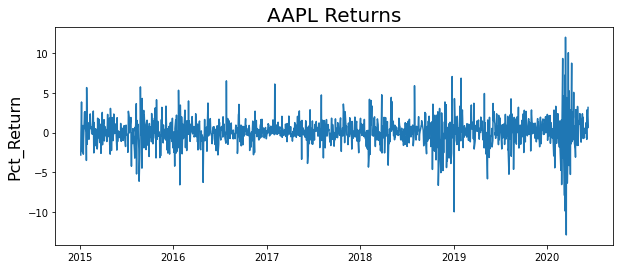

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct_Return', fontsize=16)
plt.title('AAPL Returns', fontsize=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


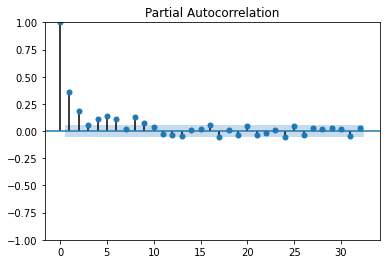

In [7]:
plot_pacf(returns**2)
plt.show()

# Trying with Fit GARCH(3,3)

In [18]:
model = arch_model(returns, p=3, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 2546.5640863454632
Iteration:      2,   Func. Count:     21,   Neg. LLF: 2544.7821098580757
Iteration:      3,   Func. Count:     32,   Neg. LLF: 2543.602189434585
Iteration:      4,   Func. Count:     42,   Neg. LLF: 2541.4823571643583
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2541.4578998064244
Iteration:      6,   Func. Count:     64,   Neg. LLF: 2541.4084444848745
Iteration:      7,   Func. Count:     74,   Neg. LLF: 2541.071325446281
Iteration:      8,   Func. Count:     84,   Neg. LLF: 2540.9053316811023
Iteration:      9,   Func. Count:     94,   Neg. LLF: 2540.766759665509
Iteration:     10,   Func. Count:    104,   Neg. LLF: 2540.7021730220185
Iteration:     11,   Func. Count:    113,   Neg. LLF: 2540.6925533618614
Iteration:     12,   Func. Count:    123,   Neg. LLF: 2540.6904409231825
Iteration:     13,   Func. Count:    132,   Neg. LLF: 2540.689837816105
Iteration:     14,   Func. Count:    141,   Neg. LLF: 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2540.69
Distribution:                  Normal   AIC:                           5095.38
Method:            Maximum Likelihood   BIC:                           5131.92
                                        No. Observations:                 1367
Date:                Wed, Jul 06 2022   Df Residuals:                     1366
Time:                        08:47:47   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1853  4.158e-02      4.455  8.387e-06 [  0.104,  0.267]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3885      0.141      2.763  5.720e-03    [  0.113,  0.664]
alpha[1]       0.1342  4.395e-02      3.052  2.272e-03  [4.801e-02,  0.220]
alpha[2]       0.0830  7.695e-02      1.079      0.281 [-6.777e-02,  0.234]
alpha[3]       0.0714  6.574e-02      1.087      0.277 [-5.742e-02,  0.200]
beta[1]        0.1006      0.337      0.299      0.765    [ -0.560,  0.761]
beta[2]        0.4832      0.266      1.817  6.921e-02 [-3.800e-02,  1.004]
===========================================================================

Covariance estimator: robust
"""

In [19]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()
model_fit.summary()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 2623.756988373548
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2617.271883034347
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2609.8937374764164
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2600.006862487326
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2591.254631526819
Iteration:      6,   Func. Count:     51,   Neg. LLF: 2587.3709577648287
Iteration:      7,   Func. Count:     59,   Neg. LLF: 2587.081175130253
Iteration:      8,   Func. Count:     67,   Neg. LLF: 2586.15683871751
Iteration:      9,   Func. Count:     74,   Neg. LLF: 2584.944456965727
Iteration:     10,   Func. Count:     81,   Neg. LLF: 2584.902427181738
Iteration:     11,   Func. Count:     88,   Neg. LLF: 2584.9006727150763
Iteration:     12,   Func. Count:     95,   Neg. LLF: 2584.9006619324055
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2584.900661932379
            Iterations: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2584.90
Distribution:                  Normal   AIC:                           5179.80
Method:            Maximum Likelihood   BIC:                           5205.90
                                        No. Observations:                 1367
Date:                Wed, Jul 06 2022   Df Residuals:                     1366
Time:                        08:48:01   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1464  4.562e-02      3.210  1.325e-03 [5.704e-02,  0.236]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.5334      0.224      6.842  7.815e-12   [  1.094,  1.973]
alpha[1]       0.1538  4.906e-02      3.135  1.718e-03 [5.765e-02,  0.250]
alpha[2]       0.1614  5.313e-02      3.038  2.383e-03 [5.727e-02,  0.266]
alpha[3]       0.1893  5.622e-02      3.366  7.614e-04 [7.907e-02,  0.299]
==========================================================================

Covariance estimator: robust
"""

In [36]:
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [37]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*2:])

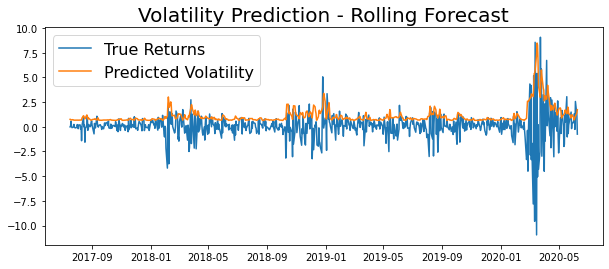

In [38]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*2:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

Text(0.5, 1.0, 'SPY Returns')

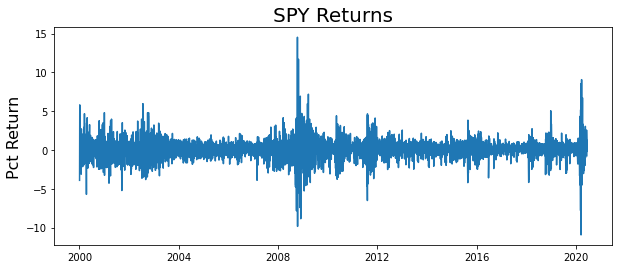

In [23]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)
tickerSymbol = 'SPY'
data = yf.Ticker(tickerSymbol)
spy = data.history(start=start, end=end).Close
returns = 100 * spy.pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


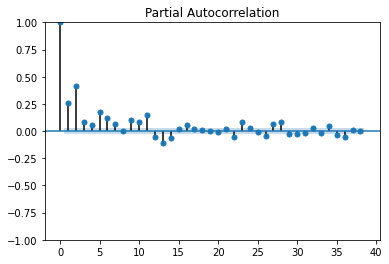

In [24]:
plot_pacf(returns**2)
plt.show()

In [25]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 7680.037664887771
Iteration:      2,   Func. Count:     18,   Neg. LLF: 7677.938184223941
Iteration:      3,   Func. Count:     28,   Neg. LLF: 7671.945516798428
Iteration:      4,   Func. Count:     36,   Neg. LLF: 7604.7397203302025
Iteration:      5,   Func. Count:     44,   Neg. LLF: 7490.030434576664
Iteration:      6,   Func. Count:     52,   Neg. LLF: 7450.388013927988
Iteration:      7,   Func. Count:     60,   Neg. LLF: 7419.381371184885
Iteration:      8,   Func. Count:     68,   Neg. LLF: 7414.4040868272805
Iteration:      9,   Func. Count:     76,   Neg. LLF: 7359.499614909153
Iteration:     10,   Func. Count:     84,   Neg. LLF: 7353.704729070907
Iteration:     11,   Func. Count:     91,   Neg. LLF: 7349.007909201411
Iteration:     12,   Func. Count:     98,   Neg. LLF: 7341.191640642747
Iteration:     13,   Func. Count:    105,   Neg. LLF: 7339.953042867219
Iteration:     14,   Func. Count:    112,   Neg. LLF: 7339.712

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7339.66
Distribution:                  Normal   AIC:                           14689.3
Method:            Maximum Likelihood   BIC:                           14722.0
                                        No. Observations:                 5140
Date:                Wed, Jul 06 2022   Df Residuals:                     5139
Time:                        08:49:05   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0748  1.250e-02      5.989  2.111e-09 [5.035e-02,9.934e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.3927  2.773e-02     14.159  1.642e-45 [  0.338,  0.447]
alpha[1]       0.1782  2.743e-02      6.496  8.244e-11 [  0.124,  0.232]
alpha[2]       0.3809  4.320e-02      8.817  1.176e-18 [  0.296,  0.466]
alpha[3]       0.2446  2.800e-02      8.738  2.365e-18 [  0.190,  0.300]
========================================================================

Covariance estimator: robust
"""

In [39]:
from arch.__future__ import reindexing
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [40]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*2:])

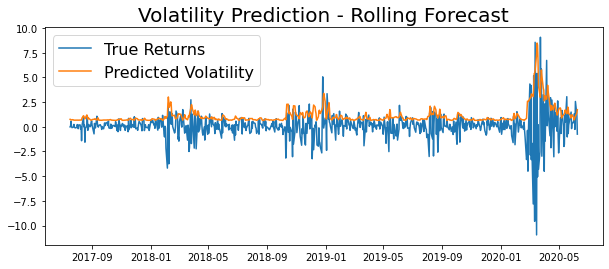

In [41]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*2:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [33]:
# train = returns
# model = arch_model(train, p=2, q=2)
# model_fit = model.fit(disp='off')

In [34]:
# pred = model_fit.forecast(horizon=7)
# future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
# pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

In [35]:
# plt.figure(figsize=(10,4))
# plt.plot(pred)
# plt.title('Volatility Prediction - Next 7 Days', fontsize=20)